In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import requests

pd.options.display.max_columns = 100
pd.options.display.max_rows = 4000

In [2]:
# data = pd.read_csv("year_2018.csv")
# data = pd.read_csv("hmda_2014_nationwide_all-records_labels.csv")
data = pd.read_csv("hmda_2015_nationwide_all-records_labels.csv")

c:\users\fenge\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (34,36,38,44,46,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = data.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14374184 entries, 0 to 14374183
Data columns (total 78 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   as_of_year                      int64  
 1   respondent_id                   object 
 2   agency_name                     object 
 3   agency_abbr                     object 
 4   agency_code                     int64  
 5   loan_type_name                  object 
 6   loan_type                       int64  
 7   property_type_name              object 
 8   property_type                   int64  
 9   loan_purpose_name               object 
 10  loan_purpose                    int64  
 11  owner_occupancy_name            object 
 12  owner_occupancy                 int64  
 13  loan_amount_000s                int64  
 14  preapproval_name                object 
 15  preapproval                     int64  
 16  action_taken_name               object 
 17  action_taken             

In [5]:
df.head()

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,loan_purpose,owner_occupancy_name,owner_occupancy,loan_amount_000s,preapproval_name,preapproval,action_taken_name,action_taken,msamd_name,msamd,state_name,state_abbr,state_code,county_name,county_code,census_tract_number,applicant_ethnicity_name,applicant_ethnicity,co_applicant_ethnicity_name,co_applicant_ethnicity,applicant_race_name_1,applicant_race_1,applicant_race_name_2,applicant_race_2,applicant_race_name_3,applicant_race_3,applicant_race_name_4,applicant_race_4,applicant_race_name_5,applicant_race_5,co_applicant_race_name_1,co_applicant_race_1,co_applicant_race_name_2,co_applicant_race_2,co_applicant_race_name_3,co_applicant_race_3,co_applicant_race_name_4,co_applicant_race_4,co_applicant_race_name_5,co_applicant_race_5,applicant_sex_name,applicant_sex,co_applicant_sex_name,co_applicant_sex,applicant_income_000s,purchaser_type_name,purchaser_type,denial_reason_name_1,denial_reason_1,denial_reason_name_2,denial_reason_2,denial_reason_name_3,denial_reason_3,rate_spread,hoepa_status_name,hoepa_status,lien_status_name,lien_status,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2015,1635900004,Department of Housing and Urban Development,HUD,7,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,265,Preapproval was not requested,2,Loan originated,1,"Riverside, San Bernardino, Ontario - CA",40140.0,California,CA,6.0,Riverside County,65.0,432.67,"Information not provided by applicant in mail,...",3,"Information not provided by applicant in mail,...",3,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Information not provided by applicant in mail,...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,Female,2,91.0,"Commercial bank, savings bank or savings assoc...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,15442,6705.0,27.700001,60500.0,135.210007,2020.0,2388.0,0
1,2015,0002735146,Consumer Financial Protection Bureau,CFPB,9,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Not owner-occupied as a principal dwelling,2,151,Not applicable,3,Loan purchased by the institution,6,NaN,NaN,Minnesota,MN,27.0,Steele County,147.0,9601.00,Not applicable,4,Not applicable,4,Not applicable,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not applicable,4,Not applicable,4,NaN,Loan was not originated or was not sold in cal...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Not applicable,4,NaN,NaN,54461,4706.0,10.840000,63600.0,118.589996,1457.0,1704.0,2
2,2015,0471809999,Department of Housing and Urban Development,HUD,7,FSA/RHS-guaranteed,4,One-to-four family dwelling (other than manufa...,1,Home purchase,1,Owner-occupied as a principal dwelling,1,148,Preapproval was not requested,2,Loan originated,1,"Portland, Vancouver, Hillsboro - OR, WA",38900.0,Oregon,OR,41.0,Columbia County,9.0,9708.00,Not Hispanic or Latino,2,Not Hispanic or Latino,2,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,1,Female,2,53.0,"Commercial bank, savings bank or savings assoc...",6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not a HOEPA loan,2,Secured by a first lien,1,NaN,NaN,60743,6851.0,13.590000,73900.0,84.589996,1559.0,2253.0,0
3,2015,0000023922,Office of the Comptroller of the Currency,OCC,1,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,3,Not owner-occupied as a principal dwelling,2,152,Not applicable,3,Loan originated,1,"Denver, Aurora, Lakewood - CO",19740.0,Colorado,CO,8.0,Broomfield County,14.0,302.00,Not Hispanic or Latino,2,No co-applicant,5,White,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No co-applicant,8,NaN,NaN,Na

In [6]:
df["loan_purpose"].value_counts()

1    6740369
3    6681146
2     952669
Name: loan_purpose, dtype: int64

In [7]:
def is_loan_successful(action):
    return 1 if action == 1 else 0    # loan originated is 1, failure is 0

df["action_taken"] = df["action_taken"].apply(is_loan_successful)

In [8]:
# data["action_taken"].value_counts()

In [9]:
df["action_taken"].value_counts()

1    7404258
0    6969926
Name: action_taken, dtype: int64

In [10]:
independents = [
    "conforming_loan_limit",
    "derived_ethnicity",
    "derived_sex",
    "preapproval",
    "loan_purpose",
    "lien_status",
    "loan_amount",
    "loan_to_value_ratio",
    "interest_rate",
    "rate_spread",
    "total_loan_costs",
    "total_points_and_fees",
    "origination_charges",
    "discount_points",
    "lender_credits",
    "loan_term",
    "prepayment_penalty_term",
    "intro_rate_period",
    "property_value",
    "construction_method",
    "multifamily_affordable_units",
    "income",
    "tract_population",
    "tract_minority_population_percent",
    "ffiec_msa_md_median_family_income",
    "tract_to_msa_income_percentage",
    "tract_owner_occupied_units",
    "tract_one_to_four_family_homes",
    "tract_median_age_of_housing_units",
]

In [11]:
betterIndependents = [
    "conforming_loan_limit",
    "derived_ethnicity",
    "derived_sex",
    "preapproval",
    "loan_purpose",
    "lien_status",
    "loan_amount",
#     "loan_to_value_ratio",
#     "total_points_and_fees",
#     "lender_credits",
#     "loan_term",
#     "prepayment_penalty_term",
#     "intro_rate_period",
#     "property_value",
    "construction_method",
#     "multifamily_affordable_units",
    "income",
    "tract_minority_population_percent",
    "ffiec_msa_md_median_family_income",
    "tract_to_msa_income_percentage",
    "tract_one_to_four_family_homes",
    "tract_median_age_of_housing_units",
]

In [12]:
betterIndependents = [
#     "conforming_loan_limit",
    "applicant_ethnicity_name",
    "applicant_sex_name",
    "preapproval",
    "loan_purpose",
    "lien_status",
    "loan_amount_000s",
#     "loan_to_value_ratio",
#     "total_points_and_fees",
#     "lender_credits",
#     "loan_term",
#     "prepayment_penalty_term",
#     "intro_rate_period",
#     "property_value",
#     "construction_method",
#     "multifamily_affordable_units",
    "applicant_income_000s",
    "minority_population",
    "hud_median_family_income",
    "tract_to_msamd_income",
    "number_of_1_to_4_family_units",
]

In [13]:
df = df[betterIndependents+["action_taken"]]

In [14]:
# df = df[(df["loan_to_value_ratio"] != "Exempt") & (df["total_points_and_fees"] != "Exempt") & (df["lender_credits"] != "Exempt") & (df["loan_term"] != "Exempt") & (df["prepayment_penalty_term"] != "Exempt") & (df["intro_rate_period"] != "Exempt") & (df["property_value"] != "Exempt") & (df["multifamily_affordable_units"] != "Exempt")]

In [15]:
def clean_conforming_loan_limit(x):
    if x == "C":      # conforming
        return 1
    elif x == "NC":   # nonconforming
        return 0
    else:
        return np.NaN

def clean_derived_ethnicity(x):
    if x == "Hispanic or Latino":
        return 1
    elif x == "Joint":
        return 0.5
    elif x == "Not Hispanic or Latino":
        return 0
    else:
        return np.NaN

def clean_derived_sex(x):
    if x == "Male":
        return 1
    elif x == "Joint":
        return 0.5
    elif x == "Female":
        return 0
    else:
        return np.NaN

def clean_loan_purpose(x):
    if x == 1 or x == 2:       # home purchase/improvement
        return 0
    elif x == 31 or x == 32:   # refinancing/cash-out refinancing
        return 1
    else:
        return np.NaN

In [16]:
def clean_loan_purpose(x):
    if x == 1 or x == 2:       # home purchase/improvement
        return 0
    elif x == 3:               # refinancing/cash-out refinancing
        return 1
    else:
        return np.NaN

In [17]:
# df["conforming_loan_limit"] = df["conforming_loan_limit"].apply(clean_conforming_loan_limit)

In [18]:
# df["derived_ethnicity"] = df["derived_ethnicity"].apply(clean_derived_ethnicity)

In [19]:
df["applicant_ethnicity_name"] = df["applicant_ethnicity_name"].apply(clean_derived_ethnicity)

In [20]:
# df["derived_sex"] = df["derived_sex"].apply(clean_derived_sex)

In [21]:
df["applicant_sex_name"] = df["applicant_sex_name"].apply(clean_derived_sex)

In [22]:
df["loan_purpose"] = df["loan_purpose"].apply(clean_loan_purpose)

In [23]:
df.dropna(inplace = True)

In [24]:
df["action_taken"].value_counts()

1    6108145
0    4046946
Name: action_taken, dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10155091 entries, 2 to 14374183
Data columns (total 12 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   applicant_ethnicity_name       float64
 1   applicant_sex_name             float64
 2   preapproval                    int64  
 3   loan_purpose                   int64  
 4   lien_status                    int64  
 5   loan_amount_000s               int64  
 6   applicant_income_000s          float64
 7   minority_population            float64
 8   hud_median_family_income       float64
 9   tract_to_msamd_income          float64
 10  number_of_1_to_4_family_units  float64
 11  action_taken                   int64  
dtypes: float64(7), int64(5)
memory usage: 1007.2 MB


In [26]:
from sklearn.model_selection import train_test_split

X = df[betterIndependents] #Features
y = df['action_taken'] #Labels

#split dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) # 70% training and 30% test

In [27]:
#import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,verbose=3,n_jobs=-1)

#train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100

building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100building tree 18 of 100

building tree 19 of 100
building tree 20 of 100


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  1.7min


building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100building tree 29 of 100

building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 12.5min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:   12.2s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:  3.2min finished


In [28]:
#create a Gaussian Classifier
clf2=RandomForestClassifier(n_estimators=100,verbose=3,n_jobs=-1, bootstrap=False, warm_start=True)

#train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train,y_train)

y_pred=clf2.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100building tree 10 of 100building tree 11 of 100
building tree 12 of 100


building tree 13 of 100
building tree 14 of 100


MemoryError: could not allocate 469762048 bytes

In [ ]:
y_pred=clf2.predict(X_train)

In [29]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6699111250577707


In [30]:
feature_imp = pd.Series(clf.feature_importances_,index=betterIndependents).sort_values(ascending=False)
feature_imp

loan_amount_000s                 0.201609
applicant_income_000s            0.184164
minority_population              0.132714
tract_to_msamd_income            0.130289
number_of_1_to_4_family_units    0.127597
hud_median_family_income         0.090196
lien_status                      0.089701
loan_purpose                     0.017886
applicant_sex_name               0.011511
preapproval                      0.010649
applicant_ethnicity_name         0.003683
dtype: float64

No handles with labels found to put in legend.


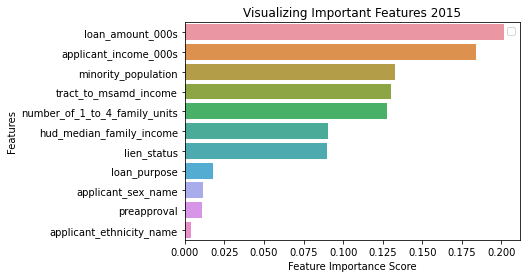

In [32]:
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features 2015")
plt.legend()
plt.show()

In [ ]:
s